In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
import sys, os
from contextlib import contextmanager
import matplotlib as mpl
import seaborn as sns
import sklearn

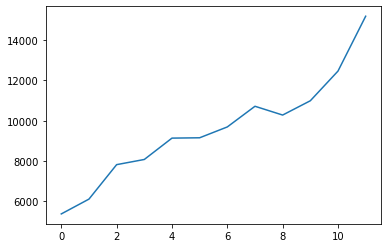

In [31]:
df = pd.read_csv('data.csv')
df.head()
plt.plot(df['Sales'])
plt.show()

    Period         Sales
0        1           NaN
1        2           NaN
2        3           NaN
3        4   6442.333333
4        5   7341.333333
5        6   8348.333333
6        7   8792.000000
7        8   9329.333333
8        9   9855.333333
9       10  10230.666667
10      11  10663.000000
11      12  11244.000000
12      13  12875.666667
13      14  13818.500000
14      15  15177.000000
15      16           NaN


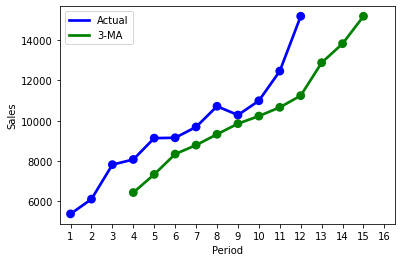

In [35]:
def moving_average(df, k, to_period):
    moving_average_df = pd.DataFrame(columns = ['Period', 'Sales'])
    num_df = len(df)
    for m in range(0, to_period):
        if m < k:
            sale_predict = float('nan')
        else:
            history = df['Sales'][m-k:m]
            sale_predict = history.mean()
        moving_average_df.loc[m] = [m+1, sale_predict]
        
    moving_average_df['Period'] = moving_average_df['Period'].astype(int)
    return moving_average_df

f, ax = plt.subplots(1, 1)
ma_df = moving_average(df, 3, 16)
print(ma_df)
sns.pointplot(x = 'Period', y = 'Sales', data = df, color = 'b')
sns.pointplot(x = 'Period', y = 'Sales', data = ma_df, color = 'g')
ax.legend(handles = ax.lines[::len(df) + 1], labels = ["Actual", "3-MA"])
plt.show()

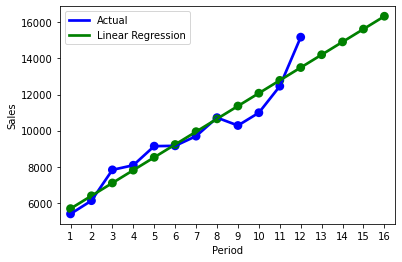

In [33]:
def linear_regression(df):
    linear_df = df.copy()
    linear_df['PeriodSales'] = linear_df['Period'] * linear_df['Sales']
    linear_df['Period_2'] = linear_df['Period'] * linear_df['Period']
    linear_df['Sales_2'] = linear_df['Sales'] * linear_df['Sales']
    linear_sum = linear_df.sum()
    linear_mean = linear_df.mean()
    
    b = (linear_sum['PeriodSales'] - len(df) * linear_mean['Period'] * linear_mean['Sales']) \
    / (linear_sum['Period_2'] - len(df) * linear_mean['Period'] * linear_mean['Period'])
    a = linear_mean['Sales'] - b * linear_mean['Period']
    return a, b

a, b = linear_regression(df)
linear_df = pd.DataFrame(columns = ['Period', 'Sales'])
for m in range(1, 17):
    sale = a + b * m
    linear_df.loc[m-1] = [m, sale]
linear_df['Period'] = linear_df['Period'].astype(int)

f, ax = plt.subplots(1, 1)
sns.pointplot(ax = ax, x = 'Period', y = 'Sales', data = df, color = 'b')
sns.pointplot(ax = ax, x = 'Period', y = 'Sales', data = linear_df, color = 'g')

ax.legend(handles = ax.lines[::len(df) + 2], labels = ["Actual", "Linear Regression"])
plt.show()

<AxesSubplot:xlabel='Period', ylabel='Sales'>

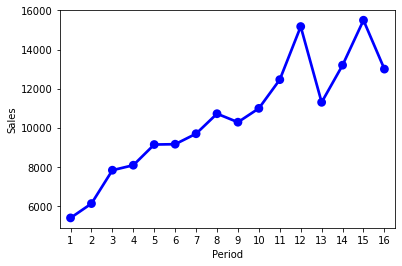

In [34]:
eval_df = pd.read_csv('actual.csv')
eval_df = pd.concat([df, eval_df], ignore_index = True)
sns.pointplot(x = 'Period', y = 'Sales', data = eval_df, color = 'b')

In [8]:
MSE = (eval_df['Sales'][12:16] - moving_average(eval_df, 3, 16)['Sales'][12:16])**2
MSE = MSE.mean()
print("MSE of {0}: {1}".format("Exponential smoothing with alpha = 0.8", MSE))
MSE = (eval_df['Sales'][12:16] - linear_df['Sales'][12:16])**2
MSE = MSE.mean()
print("MSE of {0}: {1}".format("Linear Regression", MSE))

MSE of Exponential smoothing with alpha = 0.8: 1953817.416666667
MSE of Linear Regression: 5629390.883826157
